## Human Activity Recognition
### The objective of project is to extract time series features for human activity monitoring
### Task 1


*   Apply natural visibility graph (NVG) and horizontal visibility graph (HVG) to the data
*   Compute average degree, network diameter, and average path length and Tabulate all Results
*   Generate Scatter plots considering the acitivity of Climbing down, Climbing up, Running and Walking for body parts Chest and Head


In [51]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from ts2vg import HorizontalVG
from ts2vg import NaturalVG
import seaborn as sns

In [52]:
!pip install igraph

In [53]:
!pip install ts2vg

## Reading all the datasets as dataframes from 'Data' folder in the local system and saving it into two lists for chest and head

In [54]:
#Storing the common filenames in each subject folder
filenames_chest = ['acc_climbingdown_chest.csv','acc_climbingup_chest.csv',
                   'acc_running_chest.csv','acc_walking_chest.csv', ]

filenames_head = ['acc_climbingdown_head.csv','acc_climbingup_head.csv',
                  'acc_running_head.csv','acc_walking_head.csv']

#Creating a list to store subject names
subjects = ['subject' + ' ' + str(i) for i in range(1,16)]

#Storing activities as well to add a column to every dataset
activities = ['climbingdown', 'climbingup', 'running', 'walking']

#Creating empty lists
chest_dfs = []
head_dfs = []

#Iterating through every subject folder and then through every file and reading it.
#After reading the file and saving it into dataframe, columns Subject and Activity are added to the dataframe.
#Same process repeated for head and chest.
for subject in subjects:
    for filename in filenames_chest:
        path = os.path.join('Data',subject, filename)
        for activity in activities:
            if activity in path:
                chest_df = pd.read_csv(path, index_col= 'id')
                chest_df['Subject'] = subject.split(' ')[1]
                chest_df['Activity'] = activity
                chest_dfs.append(chest_df)
                
    for filename in filenames_head:
        path = os.path.join('Data',subject, filename)
        for activity in activities:
            if activity in path:
                head_df = pd.read_csv(path, index_col= 'id')
                head_df['Subject'] = subject.split(' ')[1]
                head_df['Activity'] = activity
                head_dfs.append(head_df)

## Calculating Network Diameter, Average path length, and Average Degree for HVG and NVG for all chest datasets and combining it into a dataframe

In [55]:
#Creating an empty dataframe to store all chest data
chest_data = pd.DataFrame()

graph_name = ['HVG', 'NVG']
axis_names = ['attr_x','attr_y','attr_z']

#Iterating through every chest datasets, doing the calculations and concatenating it to the chest_data
for df in chest_dfs:
    for axis in axis_names:
        for graph in graph_name:
            if graph=='HVG':
                graph_type = HorizontalVG()
            elif graph=='NVG':
                graph_type = NaturalVG()
            graph_type.build(df[axis][1000:2048])
            ig_axis = graph_type.as_igraph()
            axis_degree = np.mean(ig_axis.degree())
            axis_dia = ig_axis.diameter()
            avg_path_len = ig_axis.average_path_length()
            chest_dict = {'Method': graph,'Subject' : df['Subject'].unique()[0],'Accelerometer axis': axis,
                         'Average Degree':axis_degree, 'Network Diameter':axis_dia, 
                          'Average path length':avg_path_len,
                          'Activity': df['Activity'].unique()[0]}

            df_dictionary = pd.DataFrame([chest_dict])
            chest_data = pd.concat([chest_data, df_dictionary], ignore_index=True)
        

## Calculating Network Diameter, Average path length, and Average Degree for HVG and NVG for all head datasets and combining it into a dataframe

In [56]:
#Creating an empty dataframe to store all head data
head_data = pd.DataFrame()
graph_name = ['HVG', 'NVG']
axis_names = ['attr_x','attr_y','attr_z']

#Iterating through every chest datasets, doing the calculations and concatenating it to the head_data
for df in head_dfs:
    for axis in axis_names:
        for graph in graph_name:
            if graph=='HVG':
                graph_type = HorizontalVG()
            elif graph=='NVG':
                graph_type = NaturalVG()
            graph_type.build(df[axis][1000:2048])
            ig_axis = graph_type.as_igraph()
            axis_degree = np.mean(ig_axis.degree())
            axis_dia = ig_axis.diameter()
            avg_path_len = ig_axis.average_path_length()
            head_dict = {'Method': graph,'Subject' : df['Subject'].unique()[0],'Accelerometer axis': axis,
                         'Average Degree':axis_degree, 'Network Diameter':axis_dia, 
                          'Average path length':avg_path_len,
                          'Activity': df['Activity'].unique()[0]}

            df_dictionary = pd.DataFrame([head_dict])
            head_data = pd.concat([head_data, df_dictionary], ignore_index=True)

# Final Chest Dataset

In [57]:
chest_data['Accelerometer axis'] = chest_data['Accelerometer axis'].map({"attr_x":'x','attr_y':'y','attr_z':'z'})

In [58]:
chest_data

,Method,Subject,Accelerometer axis,Average Degree,Network Diameter,Average path length,Activity
0,HVG,1,x,3.935115,37,14.880203,climbingdown
1,NVG,1,x,15.620229,16,6.753359,climbingdown
2,HVG,1,y,3.937023,35,12.912146,climbingdown
3,NVG,1,y,14.055344,11,4.335132,climbingdown
4,HVG,1,z,3.959924,23,9.956648,climbingdown
...,...,...,...,...,...,...,...
355,NVG,15,x,13.400763,11,4.622258,walking
356,HVG,15,y,3.952290,31,12.448561,walking
357,NVG,15,y,12.984733,12,4.708513,walking
358,HVG,15,z,3.938931,30,10.966391,walking


# Final Head Dataset

In [59]:
head_data['Accelerometer axis'] = head_data['Accelerometer axis'].map({"attr_x":'x','attr_y':'y','attr_z':'z'})

In [60]:
head_data

,Method,Subject,Accelerometer axis,Average Degree,Network Diameter,Average path length,Activity
0,HVG,1,x,3.942748,36,13.405329,climbingdown
1,NVG,1,x,10.187023,13,5.327666,climbingdown
2,HVG,1,y,3.965649,23,10.924725,climbingdown
3,NVG,1,y,13.917939,10,4.765617,climbingdown
4,HVG,1,z,3.904580,49,18.247847,climbingdown
...,...,...,...,...,...,...,...
355,NVG,15,x,7.396947,10,5.120982,walking
356,HVG,15,y,3.914122,43,16.581297,walking
357,NVG,15,y,14.127863,10,4.383050,walking
358,HVG,15,z,3.950382,43,18.074032,walking


# Visualisations for Walking and Running

In [61]:
chest_data_1 = chest_data[(chest_data['Method']=='HVG') &
                         (chest_data['Accelerometer axis']=='x') & 
                          (chest_data['Activity'].isin(['walking','running']))]
head_data_1 = head_data[(chest_data['Method']=='HVG') &
                         (chest_data['Accelerometer axis']=='x') & 
                          (chest_data['Activity'].isin(['walking','running']))]
chest_data_2 = chest_data[(chest_data['Method']=='HVG') &
                         (chest_data['Accelerometer axis']=='y') & 
                          (chest_data['Activity'].isin(['walking','running']))]
head_data_2 = head_data[(chest_data['Method']=='HVG') &
                         (chest_data['Accelerometer axis']=='y') & 
                          (chest_data['Activity'].isin(['walking','running']))]
chest_data_3 = chest_data[(chest_data['Method']=='HVG') &
                         (chest_data['Accelerometer axis']=='z') & 
                          (chest_data['Activity'].isin(['walking','running']))]
head_data_3 = head_data[(chest_data['Method']=='HVG') &
                         (chest_data['Accelerometer axis']=='z') & 
                          (chest_data['Activity'].isin(['walking','running']))]

In [62]:
chest_data_1.reset_index(inplace = True)
head_data_1.reset_index(inplace = True)

chest_data_2.reset_index(inplace = True)
head_data_2.reset_index(inplace = True)

chest_data_3.reset_index(inplace = True)
head_data_3.reset_index(inplace = True)

/var/folders/3l/9twxss2n1db0dc2cdd5jspvm0000gn/T/ipykernel_35022/798985065.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


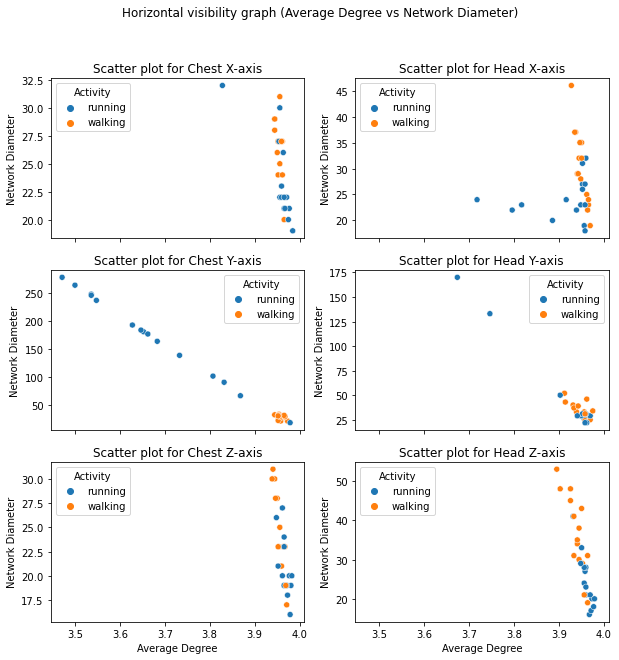

In [63]:
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(10,10))

sns.scatterplot(ax=axes[0,0], x=chest_data_1['Average Degree'],y=chest_data_1['Network Diameter'], hue=chest_data_1['Activity'])
axes[0,0].set_title('Scatter plot for Chest X-axis')
sns.scatterplot(ax=axes[0,1], x=head_data_1['Average Degree'], y=head_data_1['Network Diameter'],hue= head_data_1['Activity'])
axes[0,1].set_title('Scatter plot for Head X-axis')

sns.scatterplot(ax=axes[1,0], x=chest_data_2['Average Degree'],y=chest_data_2['Network Diameter'], hue=chest_data_2['Activity'])
axes[1,0].set_title('Scatter plot for Chest Y-axis')
sns.scatterplot(ax=axes[1,1], x=head_data_2['Average Degree'], y=head_data_2['Network Diameter'],hue= head_data_2['Activity'])
axes[1,1].set_title('Scatter plot for Head Y-axis')

sns.scatterplot(ax=axes[2,0], x=chest_data_3['Average Degree'],y=chest_data_3['Network Diameter'], hue=chest_data_3['Activity'])
axes[2,0].set_title('Scatter plot for Chest Z-axis')
sns.scatterplot(ax=axes[2,1], x=head_data_3['Average Degree'], y=head_data_3['Network Diameter'],hue= head_data_3['Activity'])
axes[2,1].set_title('Scatter plot for Head Z-axis')

fig.suptitle('Horizontal visibility graph (Average Degree vs Network Diameter)')
fig.show()


In [64]:
chest_data_11 = chest_data[(chest_data['Method']=='NVG') &
                         (chest_data['Accelerometer axis']=='x') & 
                          (chest_data['Activity'].isin(['walking','running']))]
head_data_11 = head_data[(chest_data['Method']=='NVG') &
                         (chest_data['Accelerometer axis']=='x') & 
                          (chest_data['Activity'].isin(['walking','running']))]
chest_data_22 = chest_data[(chest_data['Method']=='NVG') &
                         (chest_data['Accelerometer axis']=='y') & 
                          (chest_data['Activity'].isin(['walking','running']))]
head_data_22 = head_data[(chest_data['Method']=='NVG') &
                         (chest_data['Accelerometer axis']=='y') & 
                          (chest_data['Activity'].isin(['walking','running']))]
chest_data_33 = chest_data[(chest_data['Method']=='NVG') &
                         (chest_data['Accelerometer axis']=='z') & 
                          (chest_data['Activity'].isin(['walking','running']))]
head_data_33 = head_data[(chest_data['Method']=='NVG') &
                         (chest_data['Accelerometer axis']=='z') & 
                          (chest_data['Activity'].isin(['walking','running']))]

In [65]:
chest_data_11.reset_index(inplace = True)
head_data_11.reset_index(inplace = True)

chest_data_22.reset_index(inplace = True)
head_data_22.reset_index(inplace = True)

chest_data_33.reset_index(inplace = True)
head_data_33.reset_index(inplace = True)

/var/folders/3l/9twxss2n1db0dc2cdd5jspvm0000gn/T/ipykernel_35022/3563486626.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


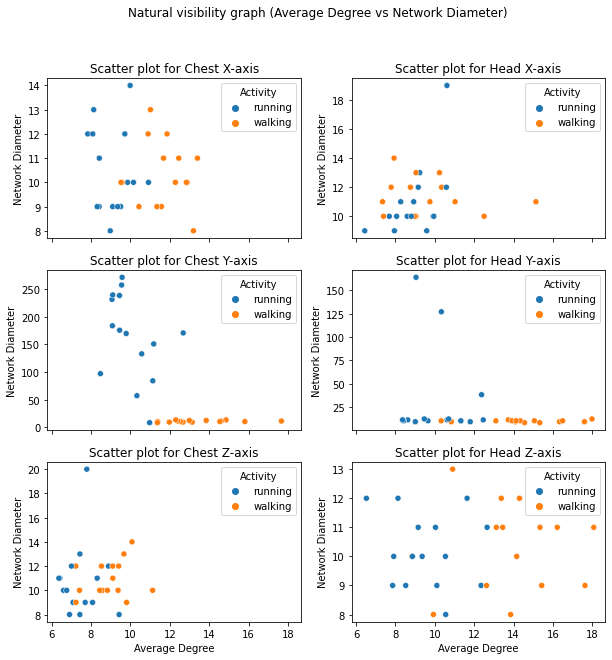

In [66]:
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(10,10))
#fig.suptitle('Bigger 1 row x 2 columns axes with no data')
sns.scatterplot(ax=axes[0,0], x=chest_data_11['Average Degree'],y=chest_data_11['Network Diameter'], hue=chest_data_11['Activity'])
axes[0,0].set_title('Scatter plot for Chest X-axis')
sns.scatterplot(ax=axes[0,1], x=head_data_11['Average Degree'], y=head_data_11['Network Diameter'],hue= head_data_11['Activity'])
axes[0,1].set_title('Scatter plot for Head X-axis')

sns.scatterplot(ax=axes[1,0], x=chest_data_22['Average Degree'],y=chest_data_22['Network Diameter'], hue=chest_data_22['Activity'])
axes[1,0].set_title('Scatter plot for Chest Y-axis')
sns.scatterplot(ax=axes[1,1], x=head_data_22['Average Degree'], y=head_data_22['Network Diameter'],hue= head_data_22['Activity'])
axes[1,1].set_title('Scatter plot for Head Y-axis')

sns.scatterplot(ax=axes[2,0], x=chest_data_33['Average Degree'],y=chest_data_33['Network Diameter'], hue=chest_data_33['Activity'])
axes[2,0].set_title('Scatter plot for Chest Z-axis')
sns.scatterplot(ax=axes[2,1], x=head_data_33['Average Degree'], y=head_data_33['Network Diameter'],hue= head_data_33['Activity'])
axes[2,1].set_title('Scatter plot for Head Z-axis')

fig.suptitle('Natural visibility graph (Average Degree vs Network Diameter)')
fig.show()

# Visualizations for Climbing up and Climbing down

In [67]:
chest_data_x1 = chest_data[(chest_data['Method']=='HVG') &
                         (chest_data['Accelerometer axis']=='x') & 
                          (chest_data['Activity'].isin(['climbingdown','climbingup']))]
head_data_x1 = head_data[(chest_data['Method']=='HVG') &
                         (chest_data['Accelerometer axis']=='x') & 
                          (chest_data['Activity'].isin(['climbingdown','climbingup']))]
chest_data_y2 = chest_data[(chest_data['Method']=='HVG') &
                         (chest_data['Accelerometer axis']=='y') & 
                          (chest_data['Activity'].isin(['climbingdown','climbingup']))]
head_data_y2 = head_data[(chest_data['Method']=='HVG') &
                         (chest_data['Accelerometer axis']=='y') & 
                          (chest_data['Activity'].isin(['climbingdown','climbingup']))]
chest_data_z3 = chest_data[(chest_data['Method']=='HVG') &
                         (chest_data['Accelerometer axis']=='z') & 
                          (chest_data['Activity'].isin(['climbingdown','climbingup']))]
head_data_z3 = head_data[(chest_data['Method']=='HVG') &
                         (chest_data['Accelerometer axis']=='z') & 
                          (chest_data['Activity'].isin(['climbingdown','climbingup']))]


In [68]:
chest_data_x1.reset_index(inplace = True)
head_data_x1.reset_index(inplace = True)

chest_data_y2.reset_index(inplace = True)
head_data_y2.reset_index(inplace = True)

chest_data_z3.reset_index(inplace = True)
head_data_z3.reset_index(inplace = True)

/var/folders/3l/9twxss2n1db0dc2cdd5jspvm0000gn/T/ipykernel_35022/353904624.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


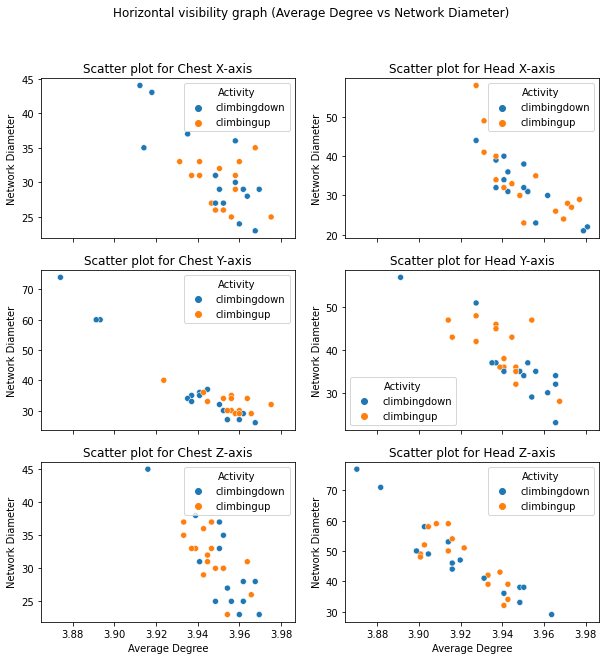

In [69]:
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(10,10))
#fig.suptitle('Bigger 1 row x 2 columns axes with no data')
sns.scatterplot(ax=axes[0,0], x=chest_data_x1['Average Degree'],y=chest_data_x1['Network Diameter'], hue=chest_data_x1['Activity'])
axes[0,0].set_title('Scatter plot for Chest X-axis')
sns.scatterplot(ax=axes[0,1], x=head_data_x1['Average Degree'], y=head_data_x1['Network Diameter'],hue= head_data_x1['Activity'])
axes[0,1].set_title('Scatter plot for Head X-axis')

sns.scatterplot(ax=axes[1,0], x=chest_data_y2['Average Degree'],y=chest_data_y2['Network Diameter'], hue=chest_data_y2['Activity'])
axes[1,0].set_title('Scatter plot for Chest Y-axis')
sns.scatterplot(ax=axes[1,1], x=head_data_y2['Average Degree'], y=head_data_y2['Network Diameter'],hue= head_data_y2['Activity'])
axes[1,1].set_title('Scatter plot for Head Y-axis')

sns.scatterplot(ax=axes[2,0], x=chest_data_z3['Average Degree'],y=chest_data_z3['Network Diameter'], hue=chest_data_z3['Activity'])
axes[2,0].set_title('Scatter plot for Chest Z-axis')
sns.scatterplot(ax=axes[2,1], x=head_data_z3['Average Degree'], y=head_data_z3['Network Diameter'],hue= head_data_z3['Activity'])
axes[2,1].set_title('Scatter plot for Head Z-axis')

fig.suptitle('Horizontal visibility graph (Average Degree vs Network Diameter)')
fig.show()

In [70]:
chest_data_x11 = chest_data[(chest_data['Method']=='NVG') &
                         (chest_data['Accelerometer axis']=='x') & 
                          (chest_data['Activity'].isin(['climbingdown','climbingup']))]
head_data_x11 = head_data[(chest_data['Method']=='NVG') &
                         (chest_data['Accelerometer axis']=='x') & 
                          (chest_data['Activity'].isin(['climbingdown','climbingup']))]
chest_data_y22 = chest_data[(chest_data['Method']=='NVG') &
                         (chest_data['Accelerometer axis']=='y') & 
                          (chest_data['Activity'].isin(['climbingdown','climbingup']))]
head_data_y22 = head_data[(chest_data['Method']=='NVG') &
                         (chest_data['Accelerometer axis']=='y') & 
                          (chest_data['Activity'].isin(['climbingdown','climbingup']))]
chest_data_z33 = chest_data[(chest_data['Method']=='NVG') &
                         (chest_data['Accelerometer axis']=='z') & 
                          (chest_data['Activity'].isin(['climbingdown','climbingup']))]
head_data_z33 = head_data[(chest_data['Method']=='NVG') &
                         (chest_data['Accelerometer axis']=='z') & 
                          (chest_data['Activity'].isin(['climbingdown','climbingup']))]

In [71]:
chest_data_x11.reset_index(inplace = True)
head_data_x11.reset_index(inplace = True)

chest_data_y22.reset_index(inplace = True)
head_data_y22.reset_index(inplace = True)

chest_data_z33.reset_index(inplace = True)
head_data_z33.reset_index(inplace = True)

/var/folders/3l/9twxss2n1db0dc2cdd5jspvm0000gn/T/ipykernel_35022/1869001529.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


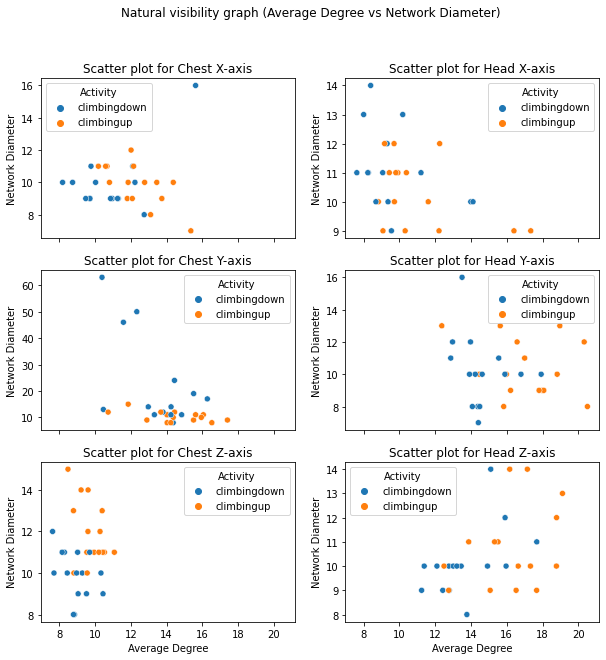

In [72]:
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(10,10))
#fig.suptitle('Bigger 1 row x 2 columns axes with no data')
sns.scatterplot(ax=axes[0,0], x=chest_data_x11['Average Degree'],y=chest_data_x11['Network Diameter'], hue=chest_data_x11['Activity'])
axes[0,0].set_title('Scatter plot for Chest X-axis')
sns.scatterplot(ax=axes[0,1], x=head_data_x11['Average Degree'], y=head_data_x11['Network Diameter'],hue= head_data_x11['Activity'])
axes[0,1].set_title('Scatter plot for Head X-axis')

sns.scatterplot(ax=axes[1,0], x=chest_data_y22['Average Degree'],y=chest_data_y22['Network Diameter'], hue=chest_data_y22['Activity'])
axes[1,0].set_title('Scatter plot for Chest Y-axis')
sns.scatterplot(ax=axes[1,1], x=head_data_y22['Average Degree'], y=head_data_y22['Network Diameter'],hue= head_data_y22['Activity'])
axes[1,1].set_title('Scatter plot for Head Y-axis')

sns.scatterplot(ax=axes[2,0], x=chest_data_z33['Average Degree'],y=chest_data_z33['Network Diameter'], hue=chest_data_z33['Activity'])
axes[2,0].set_title('Scatter plot for Chest Z-axis')
sns.scatterplot(ax=axes[2,1], x=head_data_z33['Average Degree'], y=head_data_z33['Network Diameter'],hue= head_data_z33['Activity'])
axes[2,1].set_title('Scatter plot for Head Z-axis')

fig.suptitle('Natural visibility graph (Average Degree vs Network Diameter)')
fig.show()